In [2]:
import os
import glob
import sys
import vtk

import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
from vtk.util.numpy_support import vtk_to_numpy

In [3]:
# Data import

#Case 2 -------------------------- Diameter import
data_Wave= pd.read_csv("Simulation_Data\Case_Data\Wave_Case2.csv", header=None)
data_TAB= pd.read_csv("Simulation_Data\Case_Data\TAB_Case2.csv", header=None)
data_PDPA= pd.read_csv("Simulation_Data\Case_Data\PDPA_Case2.csv", header=None)

#Case 3 -------------------------- Diameter import
TAB_Case3= pd.read_csv("Simulation_Data\Case_Data\TAB_Case3.csv", header=None)
KH_Case3= pd.read_csv("Simulation_Data\Case_Data\SMD\SMD_KH_Case3Experiment.csv", header=None)
PDPA_Case3= pd.read_csv("Simulation_Data\Case_Data\PDPA_Case3.csv", header=None)

#Case 4 -------------------------- Single droplet breakup
data_C4_SingleD= pd.read_csv("Simulation_Data\Case_Data\Case_4_Single_D.csv", header=None)
data_C4_SingleRe= pd.read_csv("Simulation_Data\Case_Data\Case4_Single_Re.csv", header=None)

#Case 2 ------------------------ Trajectory import
TAB_Traject_Case2= pd.read_csv("Simulation_Data\Case_Data\Trajectories\TAB\Trajectory_TAB_Case2.csv", header=None)
Wave_Traject_Case2= pd.read_csv("Simulation_Data\Case_Data\Trajectories\Wave\Trajectory_Wave_Case2.csv", header=None)
Traject_Exp_Case2= pd.read_csv("Simulation_Data\Case_Data\Trajectories\TAB\Trajectory_Experiment_Case2.csv", header=None)

#Case 4 -------------------------- Trajectory import
TAB_Traject_Case4= pd.read_csv("Simulation_Data\Case_Data\Trajectories\TAB\TAB_Traject_Case4.csv", header=None)
Wave_Traject_Case4= pd.read_csv("Simulation_Data\Case_Data\Trajectories\Wave\Trajectory_Wave_Case4.csv", header=None)
Traject_Exp_Case4= pd.read_csv("Simulation_Data\Case_Data\Trajectories\TAB\Trajectory_Experiment_Case4.csv", header=None)

In [4]:
# fdir = 'Simulation_Data\VTK\lagrangian\sprayCloud'
fdir = "Final_Simulations\Case2\We6\KH_Stijn\sprayCloud"
fdir2 = "Final_Simulations\Case2\We6\TAB\sprayCloud"
#check if directory exists
if not os.path.exists(fdir):
    print('Error: Path does not exist:', fdir)
    sys.exit()
if not os.path.exists(fdir2):
    print('Error: Path does not exist:', fdir2)
    sys.exit()

In [5]:
# create reader
reader = vtk.vtkXMLPolyDataReader()
# -------------------------------------------------------------------
points =[]
point_data=[]
point_d = []
point_d0 = []; sigma=[]; density=[]; dyn_viscosity=[];Reynolds=[];
#loop over all vtp files
for fname in sorted(glob.glob(os.path.join(fdir, '*.vtp'))):
    print('Reading:', fname)
    reader.SetFileName(fname)
    reader.Update()

    # print the arrays
    data = (reader.GetOutput())
    point_data.append(data.GetPointData())
    point_d.append(vtk_to_numpy((data.GetPointData()).GetArray('d')))
    point_d0.append(vtk_to_numpy((data.GetPointData()).GetArray('d0')))    
    sigma.append(vtk_to_numpy((data.GetPointData()).GetArray('sigma')))
    dyn_viscosity.append(vtk_to_numpy((data.GetPointData()).GetArray('mu')))
    density.append(vtk_to_numpy((data.GetPointData()).GetArray('rho')))
    Reynolds.append(vtk_to_numpy((data.GetPointData()).GetArray('Re')))
    points.append((vtk_to_numpy(data.GetPoints().GetData())))
    
points2 =[]
point_data2=[]
point_d2 = []
point_d02 = [];
    
for fname in sorted(glob.glob(os.path.join(fdir2, '*.vtp'))):
    print('Reading:', fname)
    reader.SetFileName(fname)
    reader.Update()

    # print the arrays
    data2 = (reader.GetOutput())
    point_data2.append(data2.GetPointData())
    point_d2.append(vtk_to_numpy((data2.GetPointData()).GetArray('d')))
    point_d02.append(vtk_to_numpy((data2.GetPointData()).GetArray('d0')))    
#     sigma.append(vtk_to_numpy((data.GetPointData()).GetArray('sigma')))
#     dyn_viscosity.append(vtk_to_numpy((data.GetPointData()).GetArray('mu')))
#     density.append(vtk_to_numpy((data.GetPointData()).GetArray('rho')))
#     Reynolds.append(vtk_to_numpy((data.GetPointData()).GetArray('Re')))
    points2.append((vtk_to_numpy(data2.GetPoints().GetData())))

Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2198.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2210.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2222.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2234.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2246.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2258.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2270.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2281.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2292.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2303.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2314.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2325.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_2336.vtp

Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3253.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3262.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3271.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3280.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3289.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3298.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3307.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3316.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3325.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3334.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3343.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3352.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_3361.vtp

Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4315.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4324.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4333.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4342.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4351.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4360.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4369.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4378.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4387.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4396.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4405.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4414.vtp
Reading: Final_Simulations\Case2\We6\KH_Stijn\sprayCloud\sprayCloud_4423.vtp

Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2803.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2812.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2821.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2830.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2839.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2848.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2857.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2866.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2875.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2884.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2893.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2902.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2911.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_2

Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3876.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3885.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3894.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3903.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3912.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3921.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3930.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3939.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3948.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3957.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3966.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3975.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3984.vtp
Reading: Final_Simulations\Case2\We6\TAB\sprayCloud\sprayCloud_3

In [6]:
px=[]
py=[]
pz=[]
for i in range(0, len(points)):
    px.append(np.array(points[i][:,0]))
    py.append(np.array(points[i][:,1]))
    pz.append(np.array(points[i][:,2]))
    
px2=[]
py2=[]
pz2=[]
for i in range(0, len(points2)):
    px2.append(np.array(points2[i][:,0]))
    py2.append(np.array(points2[i][:,1]))
    pz2.append(np.array(points2[i][:,2]))

In [8]:
diameter =[]
Reyn =[]
for i in range(0, len(points)):
    diameter.append(np.array(point_d[i]))
    
diameter2 =[]
Reyn2 =[]
for i in range(0, len(points2)):
    diameter2.append(np.array(point_d2[i]))

In [9]:
diameter_total = np.concatenate( diameter, axis=0 )
px_total = np.concatenate( px, axis=0 )
py_total = np.concatenate( py, axis=0 )
pz_total = np.concatenate( pz, axis=0 )

c = np.column_stack((py_total, pz_total,diameter_total))
c_sorted = c[np.argsort(c[:, 0])]


diameter_total2 = np.concatenate( diameter2, axis=0 )
px_total2 = np.concatenate( px2, axis=0 )
py_total2 = np.concatenate( py2, axis=0 )
pz_total2 = np.concatenate( pz2, axis=0 )

c2 = np.column_stack((py_total2, pz_total2,diameter_total2))
c_sorted2 = c2[np.argsort(c2[:, 0])]

In [11]:
# Computing the Sauter mean diameter for a specific amount of segments
d3 = pow(c_sorted[:,2],3)
sigma_d3 = sum(d3)
d2 = pow(c_sorted[:,2],2)
sigma_d2 = sum(d2)

 
splitedSize = round(len(c_sorted[:,2])/50)
d3_split = [d3[x:x+splitedSize] for x in range(1, len(d3), splitedSize)]
d2_split = [d2[x:x+splitedSize] for x in range(1, len(d2), splitedSize)]
d_avgsplit = [c_sorted[:,2][x:x+splitedSize] for x in range(0, len(c_sorted[:,2]), splitedSize)]
c_shortx  = [c_sorted[:,0][x:x+splitedSize] for x in range(0, len(c_sorted[:,0]), splitedSize)]
c_shorty  = [c_sorted[:,1][x:x+splitedSize] for x in range(0, len(c_sorted[:,1]), splitedSize)]

# Computing the Sauter mean diameter for a specific amount of segments
d32 = pow(c_sorted2[:,2],3)
sigma_d32 = sum(d32)
d22 = pow(c_sorted2[:,2],2)
sigma_d22 = sum(d22)

 
splitedSize2 = round(len(c_sorted[:,2])/50)
d3_split2 = [d32[x:x+splitedSize] for x in range(1, len(d32), splitedSize2)]
d2_split2 = [d22[x:x+splitedSize] for x in range(1, len(d22), splitedSize2)]
d_avgsplit2 = [c_sorted2[:,2][x:x+splitedSize] for x in range(0, len(c_sorted2[:,2]), splitedSize2)]
c_shortx2 = [c_sorted2[:,0][x:x+splitedSize] for x in range(0, len(c_sorted2[:,0]), splitedSize2)]
c_shorty2  = [c_sorted2[:,1][x:x+splitedSize] for x in range(0, len(c_sorted2[:,1]), splitedSize2)]


In [12]:
d32=[];c_avgx =[];c_avgy =[];d_avg =[]

for i in range(0, len(c_shortx)):
    d32.append(sum(d3_split[i])/sum(d2_split[i]))
    c_avgx.append(sum(c_shortx[i])/(len(c_shortx[i])))
    c_avgy.append(sum(c_shorty[i])/(len(c_shorty[i])))
    d_avg.append(sum(d_avgsplit[i])/(len(d_avgsplit[i])))
    
d322=[];c_avgx2 =[];c_avgy2 =[];d_avg2 =[]

for i in range(0, len(c_shortx2)):
    d322.append(sum(d3_split2[i])/sum(d2_split2[i]))
    c_avgx2.append(sum(c_shortx2[i])/(len(c_shortx2[i])))
    c_avgy2.append(sum(c_shorty2[i])/(len(c_shorty2[i])))
    d_avg2.append(sum(d_avgsplit2[i])/(len(d_avgsplit2[i])))

(-0.0047625, 0.006)

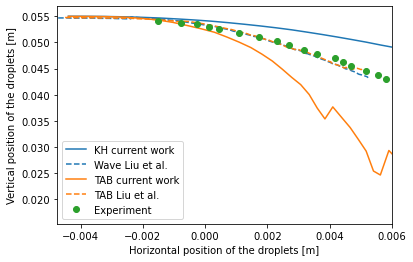

In [13]:
plt.plot(c_avgx,c_avgy, label='KH current work')
plt.plot(((Wave_Traject_Case2.iloc[:,0])/1000), (Wave_Traject_Case2.iloc[:,1]/1e3), '--',color='C0',label='Wave Liu et al.')
plt.plot(c_avgx2,c_avgy2, label='TAB current work')
plt.plot(((TAB_Traject_Case2.iloc[:,0])/1000), ((TAB_Traject_Case2.iloc[:,1]-2)/1e3), '--', color='C1',label='TAB Liu et al.')
plt.plot(((Traject_Exp_Case2.iloc[:,0])/1000), ((Traject_Exp_Case2.iloc[:,1]-2)/1e3), 'o',label='Experiment')
plt.legend()
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
plt.xlim(-0.0047625, 0.006)


(0.042, 0.056)

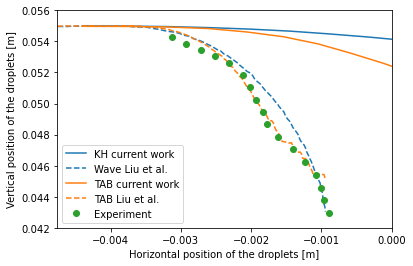

In [14]:
plt.plot(c_avgx,c_avgy, label='KH current work')
plt.plot((Wave_Traject_Case4.iloc[:,0])/1e3-0.0047625,(Wave_Traject_Case4.iloc[:,1])/1e3, '--', c='C0', label='Wave Liu et al.')
plt.plot(c_avgx2,c_avgy2, label='TAB current work')
plt.plot(((TAB_Traject_Case4.iloc[:,0])-0.0047625), ((TAB_Traject_Case4.iloc[:,1])), '--', c='C1',label='TAB Liu et al.')
plt.plot(((Traject_Exp_Case4.iloc[:,0])-0.0047625), ((Traject_Exp_Case4.iloc[:,1])), 'o',label='Experiment')
plt.legend()
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
plt.xlim(-0.0047625, 0)
plt.ylim(0.042,0.056)

(-0.0047625, 0.006)

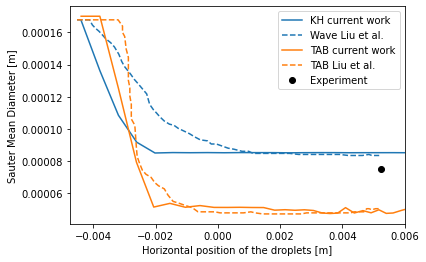

In [15]:
plt.plot(c_avgx,d32, label='KH current work')
plt.plot(((data_Wave.iloc[:, 0])/1000), (data_Wave.iloc[:, 1]/1e6), '--', color='C0', label='Wave Liu et al.')
plt.plot(c_avgx2,d322, label='TAB current work')
plt.plot(((data_TAB.iloc[:, 0])/1000), (data_TAB.iloc[:, 1]/1e6), '--', color='C1', label='TAB Liu et al.')
plt.plot(((data_PDPA.iloc[:,0])/1000), (data_PDPA.iloc[:,1]/1e6), 'ko', label='Experiment')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Sauter Mean Diameter [m]')
plt.legend()
plt.xlim(-0.0047625,0.006)

(-0.0047625, 0.006)

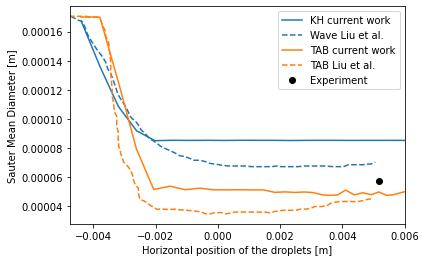

In [16]:
plt.plot(c_avgx,d32, label='KH current work')
plt.plot(KH_Case3.iloc[:,0]/1e3-0.0047625,KH_Case3.iloc[:,1]/1e6, '--', color='C0', label='Wave Liu et al.')
plt.plot(c_avgx2,d322, label='TAB current work')
plt.plot(TAB_Case3.iloc[:,0]/1e3-0.0047625,TAB_Case3.iloc[:,1]/1e6, '--', color='C1', label='TAB Liu et al.')
plt.plot(PDPA_Case3.iloc[:,0]/1e3-0.0047625,PDPA_Case3.iloc[:,1]/1e6, 'ko', label='Experiment')
plt.legend()
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Sauter Mean Diameter [m]')
plt.xlim(-0.0047625,0.006)